In [97]:
%run Helper.ipynb

Num GPUs Available:  1


In [2]:
# Load all images
images = load_images()

In [3]:
# Load all models
models = {}
for name, handle in ALL_MODELS.items():
    print('Loading model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    models[name] = load_model(handle)

Loading model EfficientDet
Legacy set to False


Model loaded!
Loading model Faster R-CNN
Legacy set to False
Model loaded!
Loading model Faster R-CNN (OpenImages)
Legacy set to True
Model loaded!
Loading model CenterNet
Legacy set to False
Model loaded!


In [4]:
# Setup detections (which can be used to generate statistics later)
detections = {}
images_with_detection = {}

# Run detection for all models
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Run inference
    images_with_detection[name] = run_inference(images, model)

Running for model EfficientDet
Legacy set to False


Running for model Faster R-CNN
Legacy set to False


Running for model Faster R-CNN (OpenImages)
Legacy set to True


Running for model CenterNet
Legacy set to False


In [5]:
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Save generated detections for statistics
    detections[name] = get_detections_for_images(images_with_detection[name])

Running for model EfficientDet
Legacy set to False
False
Running for model Faster R-CNN
Legacy set to False
False
Running for model Faster R-CNN (OpenImages)
Legacy set to True
True
Running for model CenterNet
Legacy set to False
False


In [6]:
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Draw detections on image
    draw_detections_on_images(images_with_detection[name])

Running for model EfficientDet
Legacy set to False


Running for model Faster R-CNN
Legacy set to False


Running for model Faster R-CNN (OpenImages)
Legacy set to True


Running for model CenterNet
Legacy set to False


In [7]:
for name, model in models.items():
    print('Running for model ' + name)
    
    # Set use of legacy code according to model
    set_legacy(False) if name != 'Faster R-CNN (OpenImages)' else set_legacy(True)
    print('Legacy set to ' + str(USE_LEGACY))
    
    # Save new images
    save_images(images_with_detection[name], name)

Running for model EfficientDet
Legacy set to False


Running for model Faster R-CNN
Legacy set to False


Running for model Faster R-CNN (OpenImages)
Legacy set to True


Running for model CenterNet
Legacy set to False


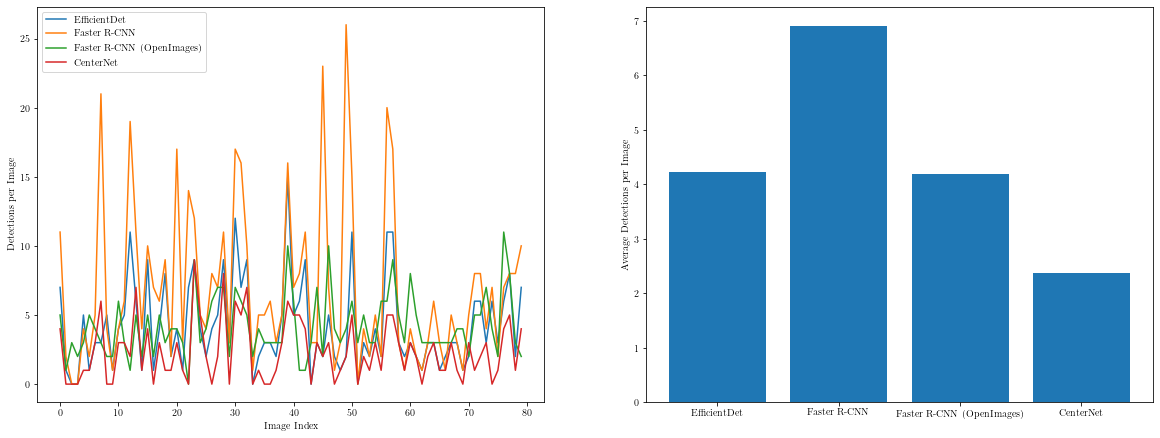

In [8]:
# Generate statistics
get_statistics_for_detections(detections, len(images))
generate_detection_charts(detections, len(images))

In [9]:
# generate_wordclouds_for_all_models(detections)

In [10]:
# generate_wordclouds_by_dataset(detections)

In [61]:
from urllib import request, parse
import json
import gzip

from io import BytesIO

In [155]:
# Get babelnet entities for detected labels
all_labels = get_detected_labels(detections['EfficientDet'])

get_entity_mapping(all_labels)

save_entity_mapping(all_labels, 'outputs/statistics/mapped_entities.csv')

{'class': 'Chair', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Person', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Vase', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Potted plant', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Dog', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Sheep', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Tie', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Dining table', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Clock', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Tennis racket', 'babelnetid': 'No match', 'wikidataid': 'No match', 'exactMatch': False}
{'class': 'Handbag', 'babelnetid': 'No match', 'wikidataid': '

EfficientDet: 0.9047714514835605
CenterNet: 0.8071253071253072
OpenImages (Faster R-CNN): 0.869935170178282
Faster R-CNN: 0.7692939244663383


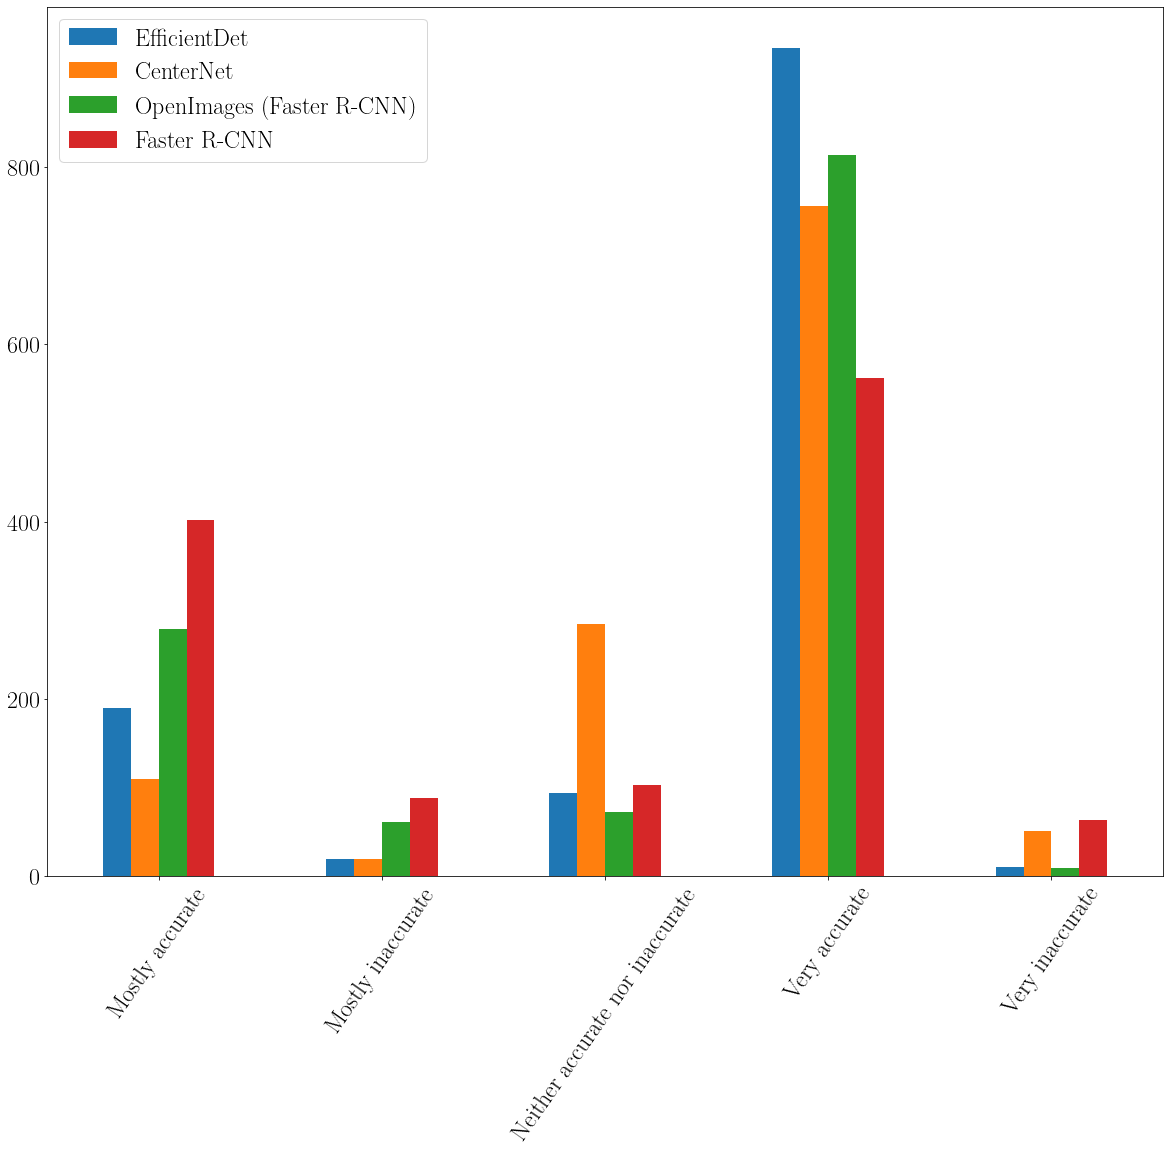

In [12]:
# Generate statistics from survey
detection_results = pd.read_csv("outputs/statistics/results_detection.csv")

mapping = {
    'Very accurate': 1,
    'Mostly accurate': 0.75,
    'Neither accurate nor inaccurate': 0.5,
    'Mostly inaccurate': 0.25,
    'Very inaccurate': 0
}

series = {}
for model_shortcut in ['EfficientDet', 'CenterNet', 'OpenImages (Faster R-CNN)', 'Faster R-CNN']:
    model_columns = detection_results.filter(like=model_shortcut[0]).columns
    
    mappings = pd.Series(dtype='float64')
    for column in model_columns:
        mappings = pd.concat([mappings, detection_results[column].dropna().map(lambda x: mapping[x])])
    
    series[model_shortcut] = detection_results[model_columns.array].apply(pd.value_counts).sum(axis=1)
    
    print(model_shortcut + ': ' + str(mappings.mean()))
    
plot = pd.DataFrame(series).plot(kind='bar', figsize=(20,16), fontsize=24)
plot.legend(prop={'size': 24})

for tick in plot.get_xticklabels():
    tick.set_rotation(55)